# **Capstone Project 2**

# **AWS SaaS Sales**
<br>

## **What is SaaS?**
Software-as-a-Service (SaaS) is a business and software delivery model that enables organizations to offer their solution in a low-friction, service-centric approach. The SaaS model relies on agility and operational efficiency as pillars of a business strategy that promotes growth, reach, and innovation. AWS services offer scalable solutions for compute, storage, databases, analytics, and more.
<br>

## **Business Problem**
What kind of analysis that we need to do?
Since we've known a brief about Saas as a service for business, we can do **B2B Saas Data Analysis**.<br>
**B2B Saas Data Analysis** itself is **The process determining and tracking that companies does to follow, track, and analyze their performance in various areas to drive business growth.** B2B market research itself is not only gathering data on what potential customers are looking for and what they need. The research can cover everything from brand perception, product fit, customer service requirements, sales and marketing strategies, and more.

It involves taking a sample of your target audience and understanding their motivations and preferences. By researching how your potential audience thinks, feels, and behaves, your strategic planning for attracting your target market will be more effective

Link for full article:

- https://hockeystack.com/blog/ultimate-guide-to-b2b-saas-analytics/#whatisb2bsaasanalytics
- https://www.qualtrics.com/experience-management/research/b2b-market-research/#:~:text=B2B%20market%20research%20is%20the,and%20marketing%20strategies%2C%20and%20more. 
<br>

Based on the dataset we have, We can make an analysis about:
<br>

1. Sales 
3. Product
5. Discount 

## **What's in The Dataset?**
<br>
This dataset contains transaction data from a fictitious SaaS company selling sales and marketing
software to other companies (B2B). In the dataset, each row represents a single transaction/order
(9,994 transactions), and the columns include:

1. **Row ID**:      A unique identifier for each transaction.
2. **Order ID**:    A unique identifier for each order.
3. **Order Date**:  The date when the order was placed.
4. **Date Key**:    A numerical representation of the order date (YYYY-MM-DD).
5. **Contact Name**: The name of the person who placed the order.
6. **Country**:      The country where the order was placed.
7. **City**:        The city where the order was placed.
8. **Region**:      The region where the order was placed.
9. **Subregion**:   The subregion where the order was placed.
10. **Customer**:   The name of the company that placed the order.
11. **Customer ID**: A unique identifier for each customer.
12. **Industry**:   The industry the customer belongs to.
13. **Segment**:    The customer segment (SMB, Strategic, Enterprise, etc.).
14. **Product**:    The product was ordered.
15. **License**:    The license key for the product.
16. **Sales**:      The total sales amount for the transaction.
17. **Quantity**:   The total number of items in the transaction.
18. **Discount**:   The discount applied to the transaction.
19. **Profit**:     The profit from the transaction.

# **DATA MANIPULATION**

Before we do further analysis, let's check the data first to see if there's any abnormality/anomalies in the data. If yes, we need to do the cleaning to get a clean data for better analysis with an expected result.

## **1. Missing Value and Cleaning Dataset**

See if there's any anomalies(missing data) in the data.
<br>

**a. Import Library**
<br>
First of all, import library to process data.

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

**b. Load Dataset**
<br>
As stated from the columns information above, we've known that there's an **Order Date and Date Key column** that consist of date. So let's present it in a datetype format. Also, there's an **Order ID and Customer ID column** that presented in a numerical type. In order to avoid any calculation when we use numerical only, let's present the number into a string.

In [39]:
df = pd.read_csv('SaaS-Sales.csv', 
                 parse_dates=['Order Date', 'Date Key'],        # Change all date format with assumption it's still in str 
                 dtype= {'Order ID': str, 'Customer ID': str})  # Change ID format with assumption it's not in str
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [40]:
# Check Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   datetime64[ns]
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   object        
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [41]:
# Check Missing Values, see if there's any missing values
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [42]:
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [43]:
# Check Duplicate, see if there's any duplicate data
df.duplicated().sum()

0

In [44]:
df.describe()

,Row ID,Order Date,Date Key,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2022-05-01 00:07:12.259355648,2022-05-01 00:07:12.259355648,229.858001,3.789574,0.156203,28.656896
min,1.000000,2020-01-04 00:00:00,2020-01-04 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2021-05-23 00:00:00,2021-05-23 00:00:00,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2022-06-27 00:00:00,2022-06-27 00:00:00,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2023-05-15 00:00:00,2023-05-15 00:00:00,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2023-12-31 00:00:00,2023-12-31 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,623.245101,2.225110,0.206452,234.260108


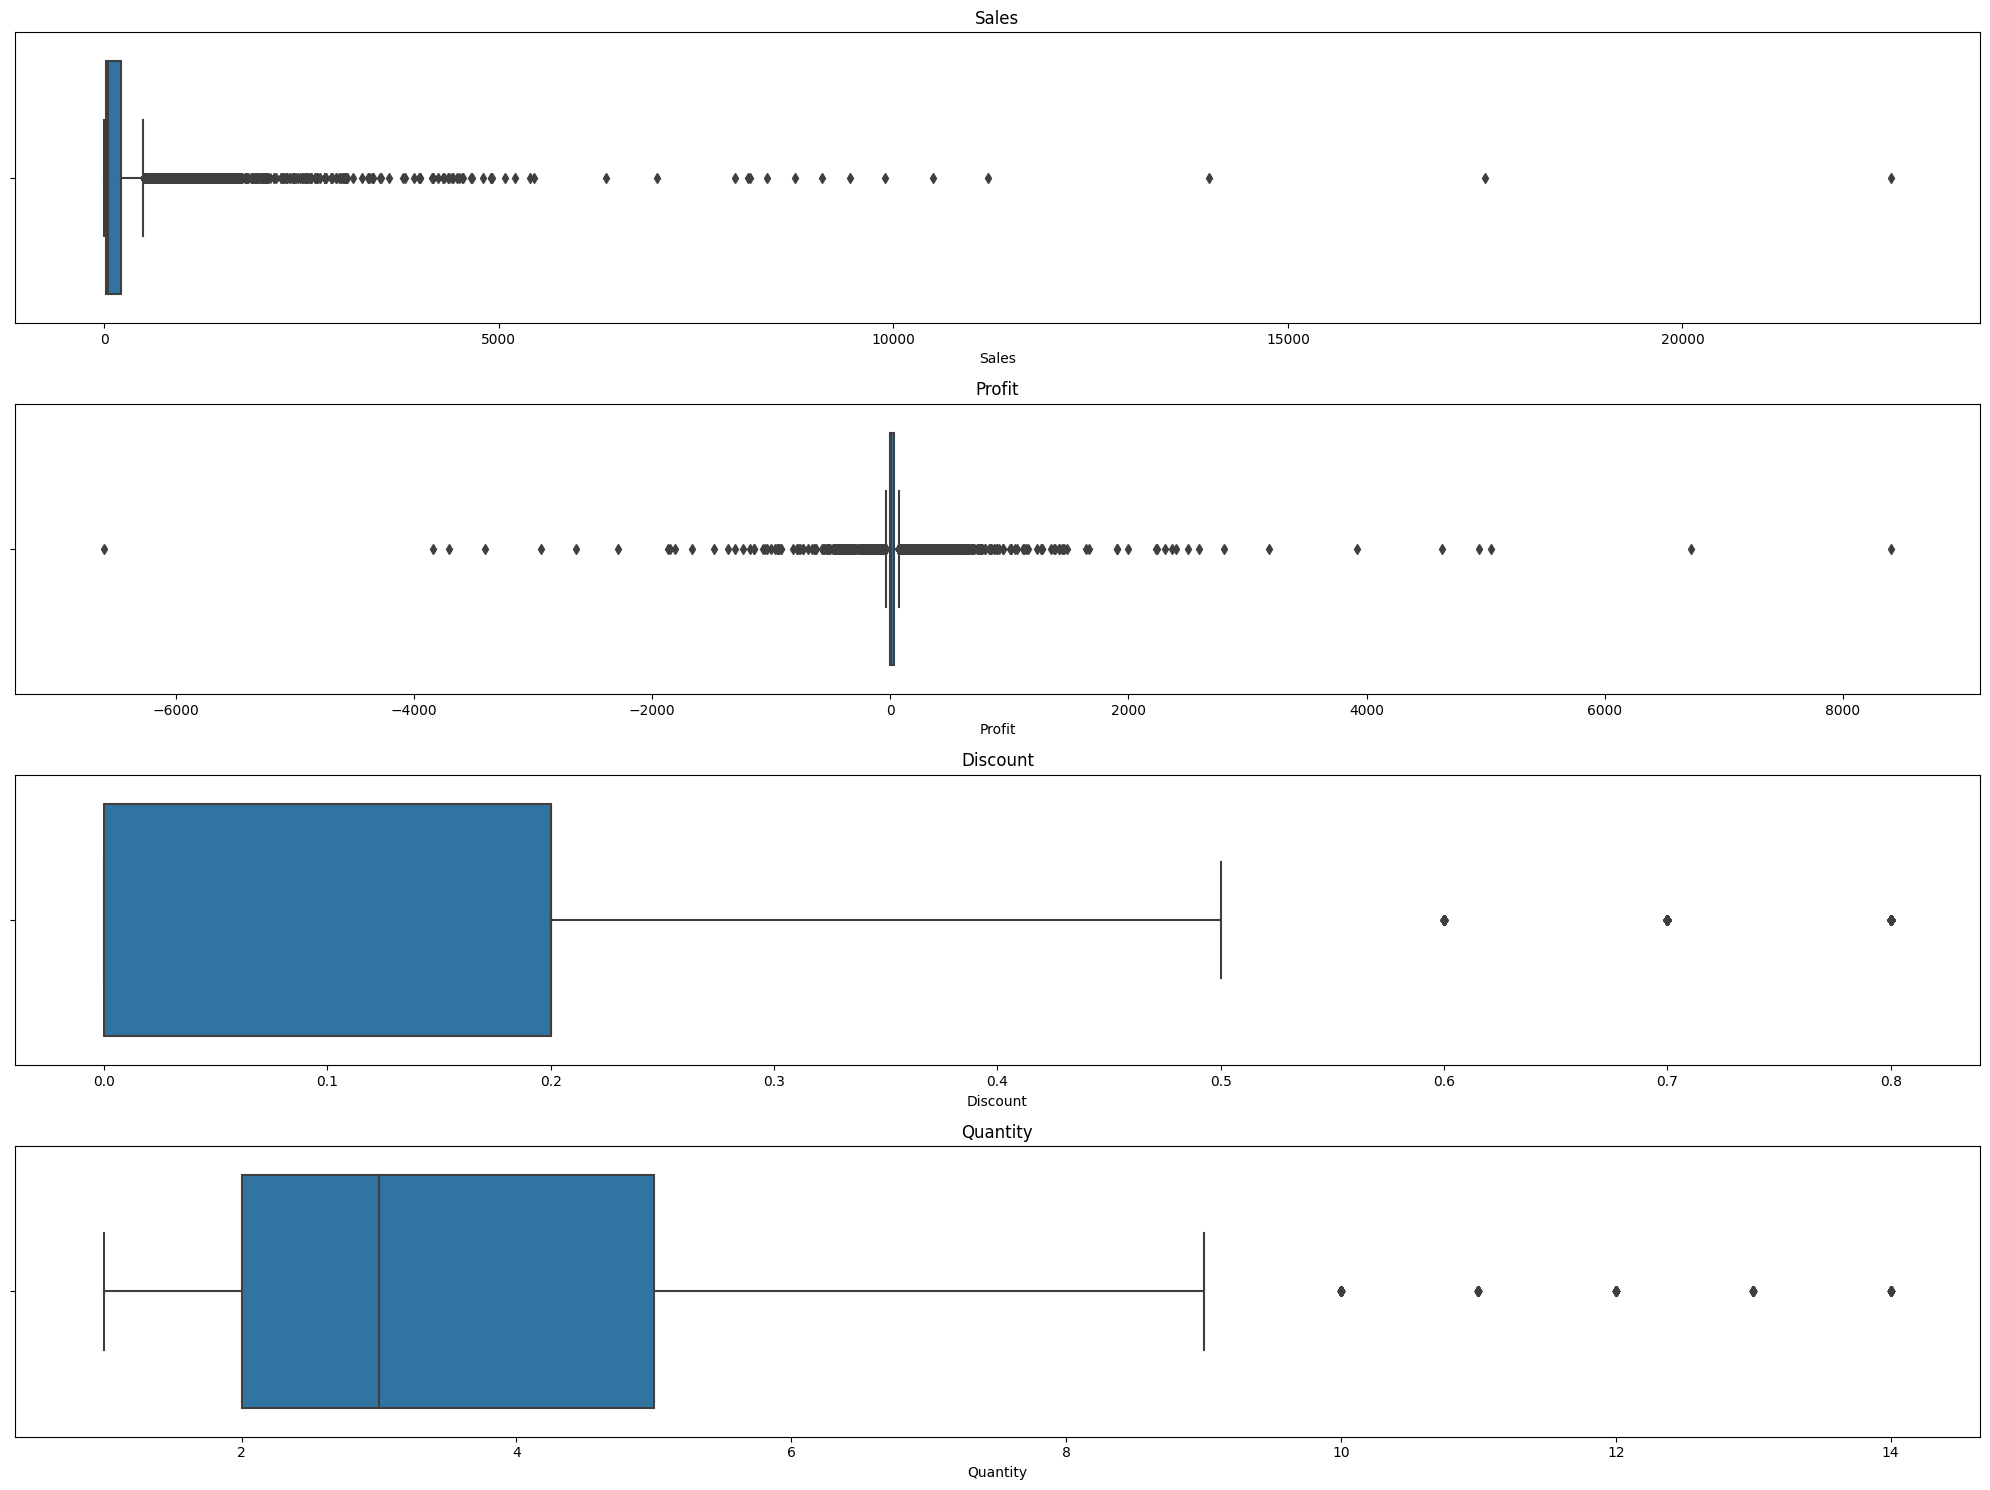

In [45]:
# Outliers
# Present Outliers with Box plot
feature = ['Sales', 'Profit', 'Discount', 'Quantity']
plt.figure(figsize=(20, 15))

for col in range(len(feature)):
    plt.subplot(4, 1, col + 1)
    sns.boxplot(data=df, x=feature[col])
    plt.title(feature[col])

plt.tight_layout()
plt.show()


**Insight**
<br>

Since one of this project purpose is visualizing data, hence i'm not gonna clean the outliers. Instead I'm just gonna present the outliers with boxplot.

In [46]:
# Check Unique Values exist in dataset
# To show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 

def unique_data(df):
    
    data_unique = pd.DataFrame()
    data_unique['Columns'] = df.columns
    data_unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    data_unique['Unique'] = [df[col].unique() for col in (df.columns)] 
    return data_unique

unique_data(df)

,Columns,Unique Count,Unique
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 2021-10-11 00:00:00, 2020-06-09 00:00:00, 2023-04-16 00:00:00, 2022-12-06 00:00:00, 2021-11-22 00:00:00, 2020-11-11 00:00:00, 2020-05-13 00:00:00, 2020-08-27 00:00:00, 2022-12-10 00:00:00, 2023-07-17 00:00:00, 2021-09-25 00:00:00, 2022-01-16 00:00:00, 2021-09-17 00:00:00, 2023-10-20 00:00:00, 2022-12-09 00:00:00, 2021-12-27 00:00:00, 2023-09-11 00:00:00, 2022-07-18 00:00:00, 2023-09-20 00:00:00, 2022-03-12 00:00:00, 2020-10-20 00:00:00, 2022-06-21 00:00:00, 2021-04-18 00:00:00, 2022-12-12 00:00:00, 2022-06-18 00:00:00, 2021-11-24 00:00:00, 2021-04-30 00:00:00, 2020-12-05 00:00:00, 2022-06-05 00:00:00, 2022-09-19 00:00:00, 2023-09-15 00:00:00, 2021-04-26 00:00:00, 2023-12-10 00:00:00, 2020-11-26 00:00:00, 2020-10-12 00:00:00, 2021-09-03 00:00:00, 2023-11-14 00:00:00, 2023-05-29 00:00:00, 2023-10-27 00:00:00, 2022-04-06 00:00:00, 2022-09-18 00:00:00, 2021-01-31 00:00:00, 2023-11-07 00:00:00, 2023-11-10 00:00:00, 2023-06-18 00:00:00, 2022-09-07 00:00:00, 2022-08-30 00:00:00, 2022-12-02 00:00:00, 2021-11-13 00:00:00, 2023-11-24 00:00:00, 2021-10-15 00:00:00, 2023-12-26 00:00:00, 2022-11-04 00:00:00, 2020-08-25 00:00:00, 2021-03-02 00:00:00, 2021-04-05 00:00:00, 2020-12-26 00:00:00, 2020-09-20 00:00:00, 2023-11-06 00:00:00, 2022-11-07 00:00:00, 2023-02-03 00:00:00, 2022-10-14 00:00:00, 2022-09-06 00:00:00, 2023-09-19 00:00:00, 2023-12-23 00:00:00, 2021-09-07 00:00:00, 2020-10-22 00:00:00, 2022-03-14 00:00:00, 2021-05-31 00:00:00, 2021-05-28 00:00:00, 2020-03-01 00:00:00, 2022-11-21 00:00:00, 2022-05-12 00:00:00, 2021-12-28 00:00:00, 2022-11-17 00:00:00, 2022-11-08 00:00:00, 2020-09-08 00:00:00, 2020-08-05 00:00:00, 2020-09-14 00:00:00, 2023-04-22 00:00:00, 2021-11-21 00:00

**Insight**
<br>

In this data unique value based on column consist of:
![Screen Shot 2023-08-23 at 09.17.42.png](<attachment:Screen Shot 2023-08-23 at 09.17.42.png>)

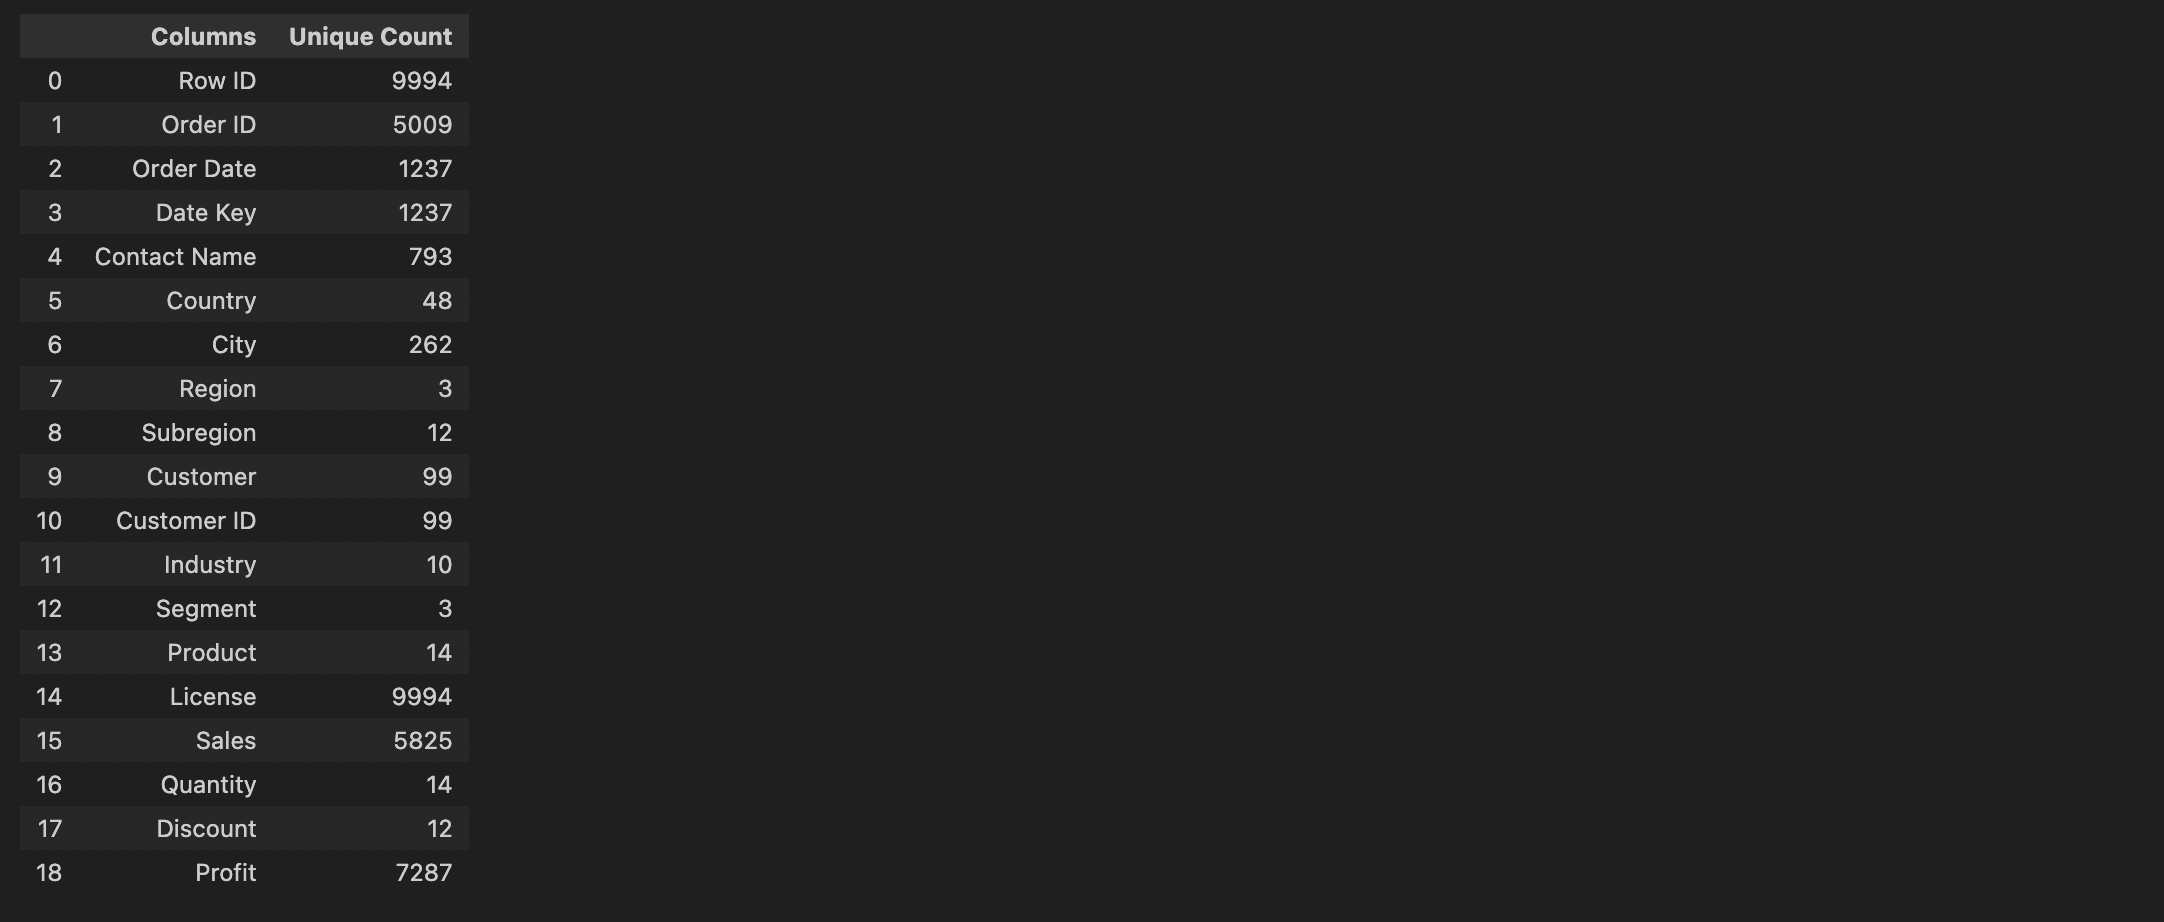

### **Data Handling**
<br>
After checking the data, turned out the original data is already clean without any missing values or duplicate data. In this state, we can continue to analysis the data. 
<br>

Usually, when we found missing values or duplicate data we can handling the data either filling the data or droping the data. After that we can continue to process the data.
We can use:
- **df.fillna(df['column'].mean())**
    - variable_dataframe.fillna(variable_dataframe['column_name'].fill_with_mean())
    - Aggregate function for numerical you can use are mean, median, modus.
    - For categorical column you can fill it with mode (modus) or a string. For example 'Unknown'.
<br>
<br>

- **df.dropna()**
    - variable_dataframe.dropna()
    - Dirrectly drop all row consist of missing values.
    - You need to be careful when using drop. Make a through analysis to choose either to drop it or to fill the data.
<br>
<br>

- **df.drop_duplicate()**
    - variable_dataframe.drop_duplicate()
    - Directly drop all the duplicate data in the dataset

# **DATA ANALYSIS**
<br>
As stated above, We're going to make an analysis about:
<br>

1. Sales 
2. Product
3. Discount 

## **1. Sales**
- a. Financial Summary
    - Revenue, Sales, and Profit
    - Profitability by Product
- b. Sales Trend 
    - Yearly Sales (Sales Throughout The Year)
    - Monthly Sales Throughout The Year

### **a. Financial Summary**

#### **1. Revenue, Sales, and Profit**

In [47]:
# Calculate Total Revenue and Total Profit
total_revenue = df['Sales'].sum()
total_profit = df['Profit'].sum()

# Calculate Total Income (Revenue - Expenses)
total_income = total_revenue - total_profit

# Calculate Profit Margin
profit_margin = (total_profit / total_revenue) * 100

print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Total Profit: ${total_profit:.2f}")
print(f"Total Income: ${total_income:.2f}")
print(f"Profit Margin: {profit_margin:.2f}%")

Total Revenue: $2297200.86
Total Profit: $286397.02
Total Income: $2010803.84
Profit Margin: 12.47%


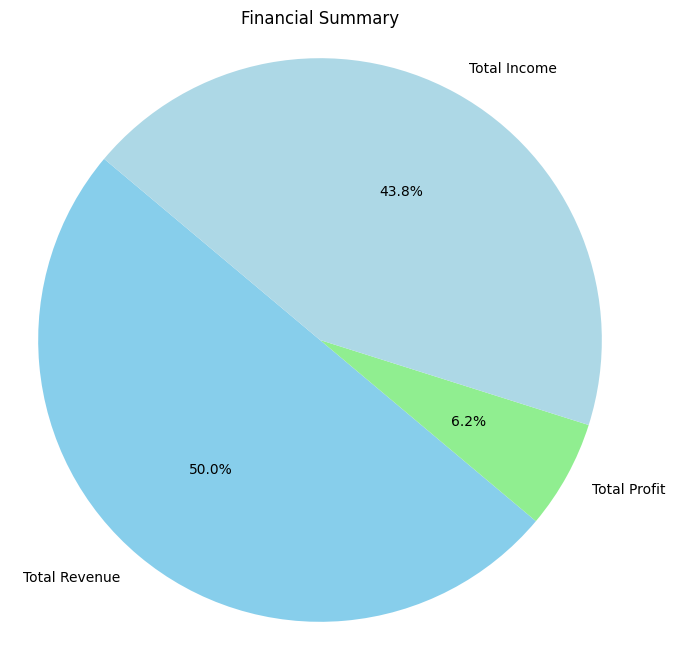

In [48]:
# Labels for the pie chart
labels = ['Total Revenue', 'Total Profit', 'Total Income']

# Values for each category
values = [total_revenue, total_profit, total_income]

# Colors for each section
colors = ['skyblue', 'lightgreen', 'lightblue']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Financial Summary')
plt.show()

**Insight**
<br>

- The proportion we get from Financial Summary are:
    - Total Revenue with <t> **50%** at **$ 2.297.200.86**
    - Total Profit with <t> **6.2%** at **$ 286.397.02**
    - Total Income with <t> **43.8%** at **$ 2.010.803.84**
    - Profit Margin with <t> **12.47%**

#### **2. Profitability by Product**

In [49]:
# Calculate Profitability by Product
product_profitability = df.groupby('Product')[['Sales', 'Profit']].sum()
product_profitability['Profit Margin (%)'] = (product_profitability['Profit'] / product_profitability['Sales']) * 100
product_profitability = product_profitability.sort_values(by='Profit Margin (%)', ascending=False)

product_profitability

,Sales,Profit,Profit Margin (%)
Product,,,
SaaS Connector Pack - Gold,16476.4020,6964.1767,42.267582
Alchemy,149528.0300,55617.8249,37.195585
Storage,3024.2800,949.5182,31.396504
Support,125152.7440,32864.4698,26.259488
Data Smasher,167380.3180,41936.6357,25.054700
ChatBot Plugin,27118.7920,6527.7870,24.071083
OneView,107532.1610,18138.0054,16.867517
SaaS Connector Pack,91705.1640,13059.1436,14.240358
Site Analytics,330007.0540,44515.7306,13.489327


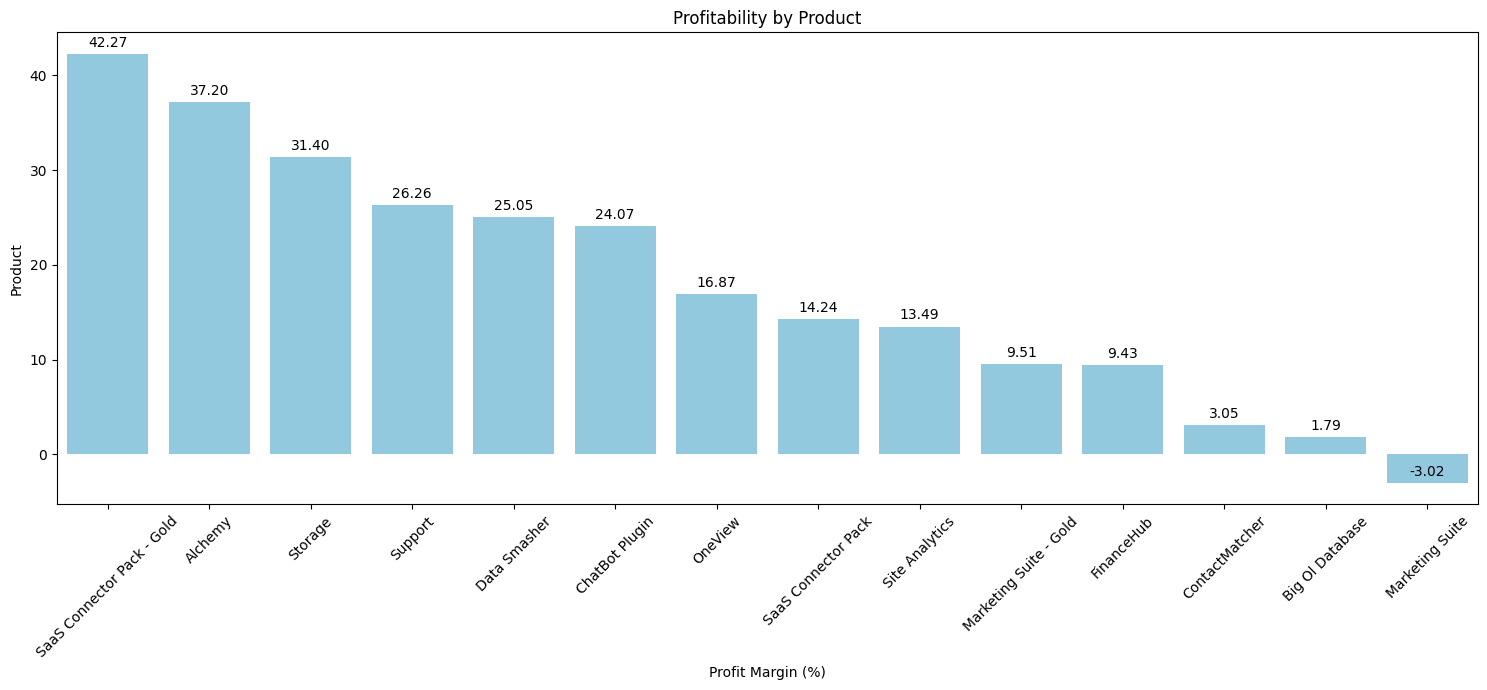

In [50]:
# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=product_profitability, x=product_profitability.index, y='Profit Margin (%)', color='skyblue')

plt.xlabel('Profit Margin (%)')
plt.ylabel('Product')
plt.title('Profitability by Product')

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                 (bar.get_x() + bar.get_width() / 2,
                 bar.get_height()), ha='center', va='center',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')

plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

**Insight**
<br>

Based on graph showed that:
- In General, each product has a noticable positive profit percentage except for **Marketing suite** with **-3.02%**
- Greatest Profitability by Product is SaaS Connector Pack - Gold with **42.27%**
- Lowest Profitability by Product is Marketing Suite with **-3.02%**

### **b. Sales Trend**

#### **1. Sales Throughout The Year**

Inthis section, let's see the Sales trend throghout the year.

In [51]:
# Sales by Year using Year on Order Date and asign it to Total Sales over the year 
df_year = df[['Order Date', 'Sales']]

# Getting the year period from Order Date Column
df_year['Year'] = df_year['Order Date'].dt.to_period('Y').dt.to_timestamp()

# Grouping sales by year
df_year = df_year.groupby('Year')['Sales'].sum().round(2).reset_index()

df_year

,Year,Sales
0,2020-01-01,484247.50
1,2021-01-01,470532.51
2,2022-01-01,608473.83
3,2023-01-01,733947.02


#### **c. Monthly Sales Throughout The Year**

In [52]:
# Sales  throughout the year using date on Order Date and asign it to Total Sales every month over the year 
df_monthly = df[['Order Date', 'Sales']]

# Getting the date period from Order Date Column
df_monthly['Year'] = df_monthly['Order Date'].dt.to_period('M').dt.to_timestamp()

# Grouping sales by date
df_monthly = df_monthly.groupby('Year')['Sales'].sum().round(2).reset_index()

df_monthly.head(10)

,Year,Sales
0,2020-01-01,13946.23
1,2020-02-01,4810.56
2,2020-03-01,55691.01
3,2020-04-01,28295.34
4,2020-05-01,23648.29
5,2020-06-01,34595.13
6,2020-07-01,33946.39
7,2020-08-01,27909.47
8,2020-09-01,81777.35
9,2020-10-01,31453.39


Now, let's visualize both of data with graphic.

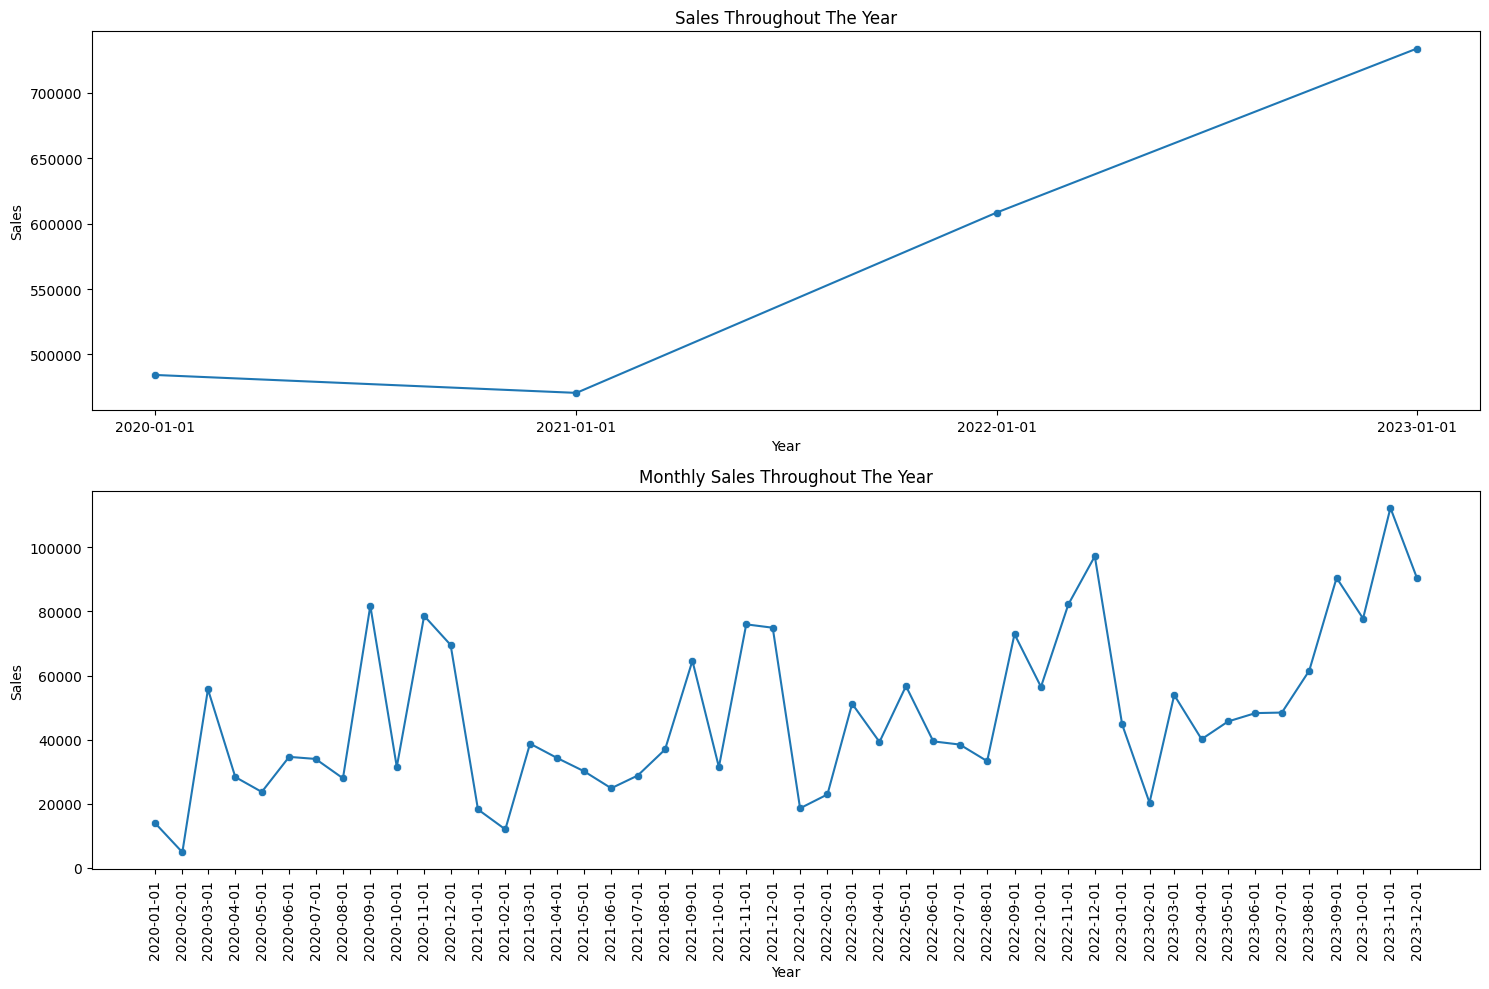

In [53]:
# Using Subplot to visualize and compare the data at the same time
# Graph Sizing 
plt.figure(figsize=(15, 10))

# Subplot Order for 1st Graph
plt.subplot(2, 1, 1)

# Visualizing the graphic of Yearly Sales (Sales Throughout The Year)
sns.lineplot(data=df_year, x='Year', y='Sales')

# Overlaying Line with Dots Using Scatterplot (You can also call it as marking the line)
sns.scatterplot(data=df_year, x='Year', y='Sales')

# Title for the graph
plt.title('Sales Throughout The Year')
plt.xticks(ticks=df_year['Year'].sort_values().unique())

# Subplot Order for 2nt Graph
plt.subplot(2, 1, 2)
# Visualizing the graphic of Monthly Sales Throughout The Year
sns.lineplot(data=df_monthly, x='Year', y='Sales')

# Overlaying Line with Dots Using Scatterplot (You can also call it as marking the line)
sns.scatterplot(data=df_monthly, x='Year', y='Sales')

# Title for the graph
plt.title('Monthly Sales Throughout The Year')
plt.xticks(ticks=df_monthly['Year'].sort_values().unique(), rotation=90)


plt.tight_layout()
plt.show()

**Insight**
<br>

- For sales through out the year, in **2021** sales had **Drop** to **470532.5090** compared to 2020 sales accumulation at 484247.4981. Since then Sales has gradualy increacing, significantly in **2023** with total sales **733947.0232**. 

- As for Monthly Sales Throughout The Year:
    - Q1: 
        - Sales tends to drop in the second month (02/ February) of the Q1 in every year, and rises back in the last month (03/March) of the Q1.
    - Q2: 
        - In the year of 2020 and 2022 it **Tends to Drop** in the second month (05/ May) of Q2 in every year, and **Rises Back** in the last month (06/June) of the Q2. 
        - In the year of 2021, from the fisrt month of the second quartal, sales **Continuosly Droping** until the last month of the second quartal. 
        - In the year of 2023, the sales **Continuosly Rising** from the first month to the last month of Q2. 
    - Q3: 
        - Sales in 2020 and 2022 drop in the second month (08/August) of Q3 and increasing in the third month (09/September).
        - Sales in 2021 and 2023 continuosly increasing from the first month till the end of quarter
    - Q4: 
        - Generaly, sales in the Q4 is increasing at the second month of quartal (11/November) and droped in the last month (12/December), except in the year of 2022 where the sales increasing in the last month of quartal (12/December).
<br>
<br>

- We can conclude there's a pattern in yearly sales where 2 of months at the end of year had a **Significant Increase**, especially in **November 2023** where it's **The Peak of Sales** from all of the monthly sales throughout the year.

## **2. Product**
<br>
In this Section, we're trying to see comparison between Highest Product by Sales and Most Favorite Product by Customer Repurchase. 
We can determine it by:

- Hightest Product by Sales --> Best Selling Product
- Highest Product Count by Customer Repurchase --> Customer Most Prefered Product

### **a. Best Selling Product (Product by Revenue)**

In [54]:
# Best Selling Product (Product by Total Revenue)
bestseller = df.groupby('Product')[['Sales']].sum().sort_values(by='Sales', ascending=False)
bestseller

,Sales
Product,
ContactMatcher,410378.2650
FinanceHub,340935.4150
Site Analytics,330007.0540
Marketing Suite - Gold,223843.6080
Big Ol Database,189238.6310
Data Smasher,167380.3180
Alchemy,149528.0300
Support,125152.7440
Marketing Suite,114879.9963


Let's try to display Top 5 Country of Every Product Sales.

In [55]:
# Top 5 Country by Product Sales
def top5_product_country(df):
    data_unique = pd.DataFrame()
    unique_products = df['Product'].unique()

    for product in unique_products:
        product_data = df[df['Product'] == product]
        top_countries = product_data.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(5)
        data_unique[f'{product} Top 5 Countries'] = top_countries.index.tolist()
        data_unique[f'{product} Top 5 Sales'] = top_countries.tolist()

    return data_unique

top5_product_country(df)

,Marketing Suite Top 5 Countries,Marketing Suite Top 5 Sales,FinanceHub Top 5 Countries,FinanceHub Top 5 Sales,ContactMatcher Top 5 Countries,ContactMatcher Top 5 Sales,Marketing Suite - Gold Top 5 Countries,Marketing Suite - Gold Top 5 Sales,SaaS Connector Pack Top 5 Countries,SaaS Connector Pack Top 5 Sales,ChatBot Plugin Top 5 Countries,ChatBot Plugin Top 5 Sales,Site Analytics Top 5 Countries,Site Analytics Top 5 Sales,OneView Top 5 Countries,OneView Top 5 Sales,Support Top 5 Countries,Support Top 5 Sales,Data Smasher Top 5 Countries,Data Smasher Top 5 Sales,SaaS Connector Pack - Gold Top 5 Countries,SaaS Connector Pack - Gold Top 5 Sales,Storage Top 5 Countries,Storage Top 5 Sales,Big Ol Database Top 5 Countries,Big Ol Database Top 5 Sales,Alchemy Top 5 Countries,Alchemy Top 5 Sales
0,United States,27558.5215,United States,65978.508,United States,73903.400,United States,45112.290,United States,19996.480,United States,5495.660,United States,67964.536,United States,24175.920,United States,32478.900,United States,37255.010,United States,3237.340,United States,479.530,United Kingdom,43183.500,United States,24559.520
1,United Kingdom,22777.1440,United Kingdom,47930.577,United Kingdom,46396.570,United Kingdom,26943.490,United Kingdom,10374.140,United Kingdom,2983.600,United Kingdom,47502.620,United Kingdom,13564.080,Japan,11500.216,United Kingdom,19743.990,Japan,2530.648,Japan,332.464,United States,29492.016,Canada,20249.830
2,Japan,14493.4588,Japan,27156.048,Canada,43218.448,Japan,15723.584,France,7347.816,Japan,2369.528,Japan,28589.568,Mexico,4807.536,United Kingdom,11107.010,Canada,15119.160,United Kingdom,1776.830,United Kingdom,286.510,Germany,24573.940,United Kingdom,18599.820
3,France,5230.7550,France,19322.478,Brazil,28538.550,Canada,13163.200,Spain,4709.430,Chile,1389.152,France,19702.404,France,4663.280,France,9088.512,Japan,11328.560,France,1234.064,Canada,263.200,Japan,19546.224,India,18499.930
4,Egypt,4404.9000,Canada,17540.762,Japan,24803.337,France,11784.624,Mexico,4088.624,France,1152.160,Australia,16771.784,Brazil,4324.149,Spain,5780.930,Mexico,8222.872,Spain,1084.080,Mexico,204.896,Sweden,12620.655,France,13079.868


Since in the total sales by product had a significant difference in each product, let's try to compare it with average of sales. Let's try to prove it with ANOVA test instead. To see weather any specific product contribute to sales significantly.

In [56]:
# Import Library
from scipy.stats import f_oneway

stats, pvalue = f_oneway(df.loc[df['Product'] == 'Alchemy', 'Sales'],
                         df.loc[df['Product'] == 'Big Ol Database', 'Sales'],
                         df.loc[df['Product'] == 'ChatBot Plugin', 'Sales'],
                         df.loc[df['Product'] == 'ContactMatcher', 'Sales'],
                         df.loc[df['Product'] == 'Data Smasher', 'Sales'],
                         df.loc[df['Product'] == 'FinanceHub', 'Sales'],
                         df.loc[df['Product'] == 'Marketing Suite', 'Sales'],
                         df.loc[df['Product'] == 'Marketing Suite - Gold', 'Sales'],
                         df.loc[df['Product'] == 'OneView', 'Sales'],
                         df.loc[df['Product'] == 'SaaS Connector Pack', 'Sales'],
                         df.loc[df['Product'] == 'SaaS Connector Pack - Gold', 'Sales'],
                         df.loc[df['Product'] == 'Site Analytics', 'Sales'],
                         df.loc[df['Product'] == 'Storage', 'Sales'],
                         df.loc[df['Product'] == 'Support', 'Sales'],)
pvalue

0.0

In [57]:
if pvalue > 0.05:
    #Ho
    print(f''' Pvalue = {pvalue}. Pvalue > 0.05. Accept Ho.
          We don't have enough evidence to claim that there is at least one product whose mean sales are different
          (The average sales do not differ significantly)''')
else: # pvalue <= 0.05
    # Alternative Hypothesis (Ha)
    print(f''' Pvalue = {pvalue}. Pvalue > 0.05. Reject Ho.
          We have enough evidence to claim that there is at least one product whose mean sales are different
          (The average sales differ significantly)''')


 Pvalue = 0.0. Pvalue > 0.05. Reject Ho.
          We have enough evidence to claim that there is at least one product whose mean sales are different
          (The average sales differ significantly)


In [58]:
df.groupby('Product')[['Sales']].mean()

,Sales
Product,
Alchemy,2198.941618
Big Ol Database,1645.553313
ChatBot Plugin,34.068834
ContactMatcher,222.789503
Data Smasher,215.974604
FinanceHub,347.538649
Marketing Suite,503.859633
Marketing Suite - Gold,264.590553
OneView,230.755710


Since the average product sales had a signifficant differnce, now let's try to see with customer repurchases.

**Insight**
<br>

We can analyze Business flow or How the business work based on the country enviorment to match the daily habit of the business world in that country.
By adjusting the needs or the business flow, it may attract the custumers of the product in a way they can use for work eficiency. That way we can find bast way to advertise the product, through advertisement business analysis match the country targeted.

### **b. Customer Most Prefered Product (Customer Purchased Product by Count)**
<br>

- In the first code, analist try to calculate through Product Count based on repurchases by Customer.

In [59]:
# Group by 'Customer' and 'Product', and then count occurrences
preferred_categories = df.groupby(['Customer', 'Product']).size()

# Convert the result to a DataFrame
cust_preferred_categories = preferred_categories.reset_index(name='Count')
cust_preferred_categories = cust_preferred_categories.sort_values(by='Count', ascending=False)
cust_preferred_categories.head(10)

,Customer,Product,Count
488,Ford Motor,ContactMatcher,39
52,Allianz,ContactMatcher,37
27,Aetna,ContactMatcher,35
1020,Siemens,ContactMatcher,35
1134,Tyson Foods,ContactMatcher,33
380,Comcast,Support,32
498,Ford Motor,Support,32
802,Morgan Stanley,ContactMatcher,32
89,Amazon,ContactMatcher,31
257,CVS Health,ContactMatcher,31


- In the second code, analyst try to calculate the total count of product by Customer repurchases.

In [60]:
# We can also count the product and occurrences only through Group by 'Product'
preferred_categories_all = df.groupby(['Product']).size()

# Convert the result to a DataFrame
preferred_categories_count = preferred_categories_all.reset_index(name='Count')
preferred_categories_all = preferred_categories_count.sort_values(by='Count', ascending=False)
preferred_categories_all

,Product,Count
3,ContactMatcher,1842
13,Support,1560
5,FinanceHub,981
9,SaaS Connector Pack,957
11,Site Analytics,889
7,Marketing Suite - Gold,846
2,ChatBot Plugin,796
4,Data Smasher,775
8,OneView,466
10,SaaS Connector Pack - Gold,254


From both table we knew that ContactMatcher has the highest rate of repurchase items. Now, let's see if it's truly dominate the product sales by testing it's proportion. Testing the proportion with Z-Test. 

Theoritical Proportion used 0.5
<br>
Hypotheses:
- Ho: Proporsi Fiction = 50% / 0.5
- Ha: Proporsi Fiction != 50% / 0.5

In [61]:
# Let's try to see the proportion of ContactMatcher as the most prefed product of customer purchases
# Since it was the greatest number differnce is pretty significant from the second place to third

# Import Library 
from statsmodels.stats.proportion import proportions_ztest

# Jumlah Buku Fiction 
jml_fiction = df['Product'].value_counts()['ContactMatcher']

#Jumlah Keseluruhan Buku
jml_all = len(df['Product'])

# Z -Test
ststs, pvalue = proportions_ztest(count= jml_fiction,
                  nobs= jml_all,
                  value= 0.5)
pvalue

0.0

In [62]:
# Conclution
if pvalue > 0.05:
    # Ho
    print(f'''
    Pvalue ={pvalue}. Gagal Menolak Ho.
    Kita Tidak Punya Cukup Bukti untuk Mengatakan Bahwa Prororsi dari ContactMatcher Sama dengan 0.5.
    (Proporsinya Tidak Berbeda Signifikan)''')
else:
    # Ha
    print(f'''
    Pvalue ={pvalue}. Berhasil Menolak Ho.
    Kita Punya Cukup Bukti untuk Mengatakan Bahwa Prororsi dari ContactMatcher Tidak Sama dengan 0.5.
    (Proporsinya Berbeda Signifikan)''')


    Pvalue =0.0. Berhasil Menolak Ho.
    Kita Punya Cukup Bukti untuk Mengatakan Bahwa Prororsi dari ContactMatcher Tidak Sama dengan 0.5.
    (Proporsinya Berbeda Signifikan)


**Insight**
<br>

- Best Selling Product is the product where it's love by the customer (based on customer most prefered product through count of repurchases).
- ContactMatcher might be hold the highest count or repurchases and sales, but it's not dominating the total sales quantity as a whole.

Now, let's try to compare Best Selling Product (Product by Revenue) and Customers Most Prefered Product with visualization.

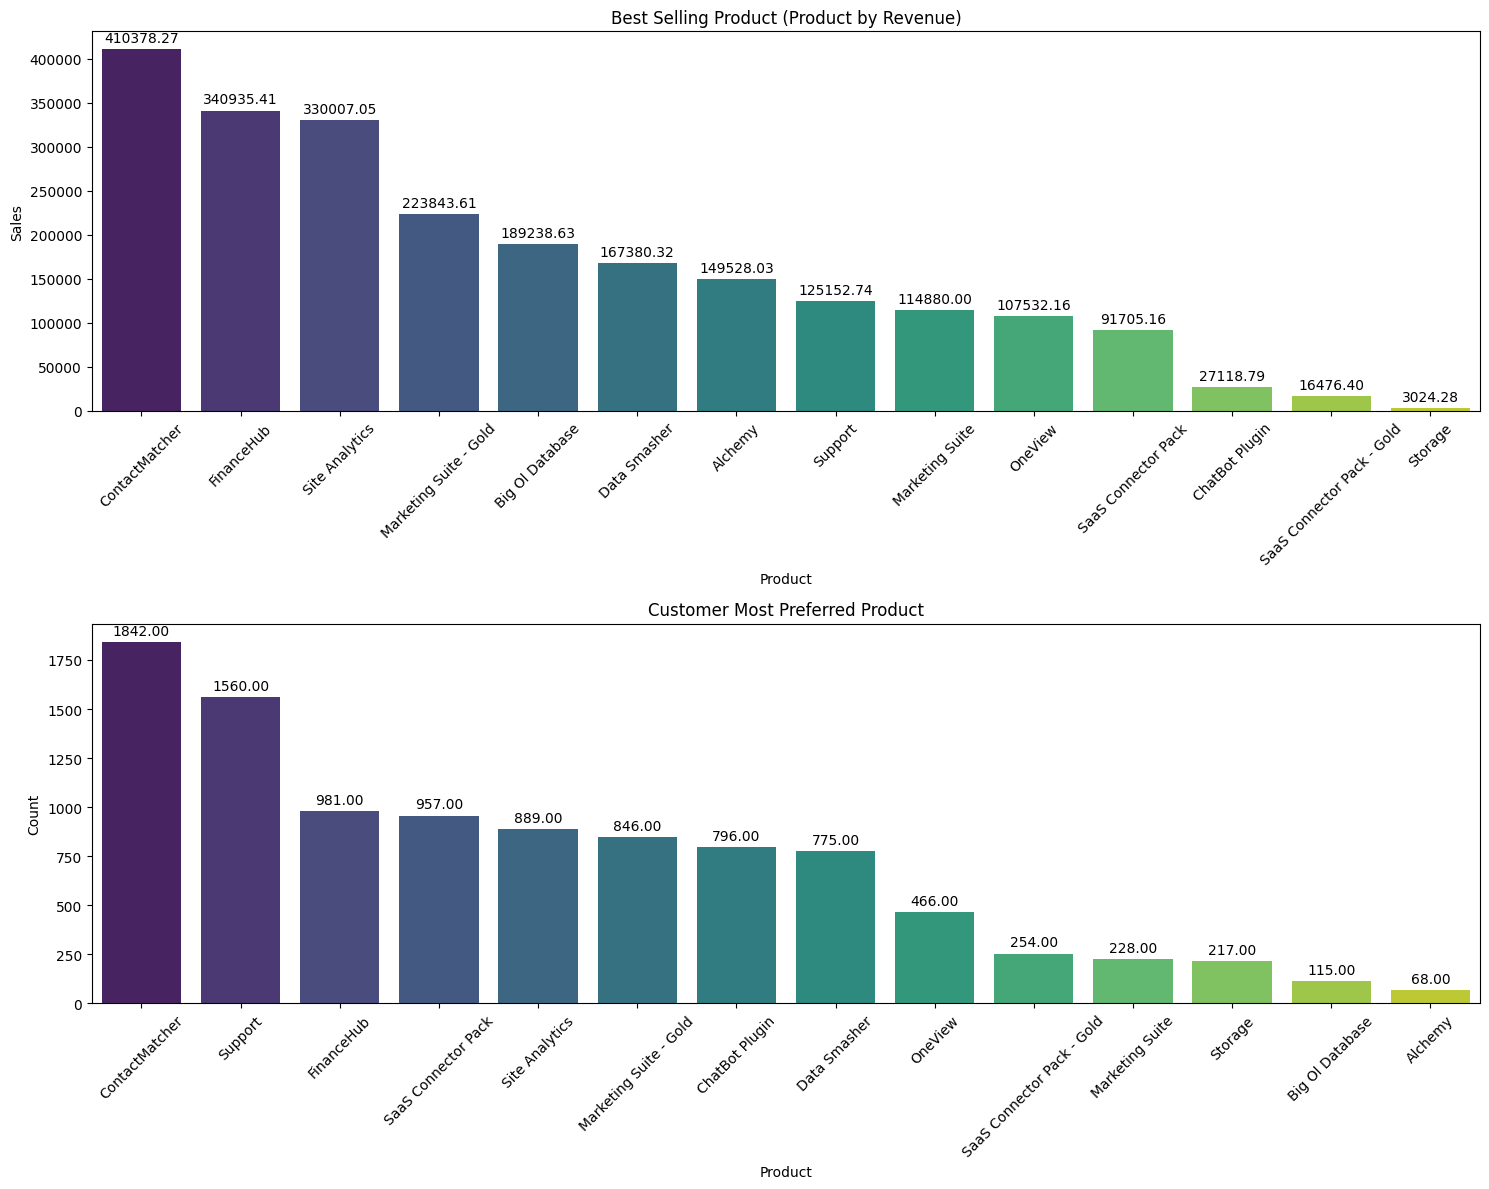

In [63]:
# Assuming you have 'bestseller' and 'cust_preferred_categories' DataFrames

# Create a 2x2 subplot grid
plt.figure(figsize=(15, 12))

# First subplot for Best Selling Product
plt.subplot(2, 1, 1)
ax1 = sns.barplot(data=bestseller, x=bestseller.index, y='Sales', palette='viridis', ci=0)
plt.title('Best Selling Product (Product by Revenue)')
plt.xticks(rotation=45)

for bar in ax1.patches:
    ax1.annotate(format(bar.get_height(), '.2f'),
                 (bar.get_x() + bar.get_width() / 2,
                 bar.get_height()), ha='center', va='center',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')

# Second subplot for Customer Most Preferred Product
plt.subplot(2, 1, 2)
ax = sns.barplot(data=preferred_categories_all, x='Product', y='Count', palette='viridis')
plt.title('Customer Most Preferred Product')
plt.xticks(rotation=45)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                 (bar.get_x() + bar.get_width() / 2,
                 bar.get_height()), ha='center', va='center',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')


# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

**Insight**
<br>

- Best Selling Product is the product where it's love by the customer (based on customer most prefered product through count of repurchases).
- When we compare the two graphic of Best Seller Product and Customer Most Prefered Product we can spot that:
    - Top 5 Best Seller Products are:           **ContactMatcher, FinanceHub, Site Analytics, Marketing Suite - Gold, Big Ol Database**
    - Top 5 Customer Most Prefered Product are: **ContactMatcher, Support, FinanceHub, SaaS Connector Pack, Site Analytics**
- We have a space for improvement of sales based on customer prefered product that not included in top 5 of sales. For example **SaaS Connector Pack** that placed **4th** in the most prefered product while in the sales rank was placed at **10th**
- From insight above we can conclude that there's an aspect/factor we can anylize further for **customers habit or behaviour** that can determine kind of products they choose to suit the **business enviornment** they encounter or even **demographics** of the place itself-such as Region, Sub-Region, Country, or even City.

### **c. Product Growth**

Now, let's try to see the Growth Rate % of products.

In [64]:
# Calculate growth rate for each product
product_growth = df.groupby('Product')[['Sales']].sum()

# Using pct.change() to see the growth rate in percentage
product_growth['Growth Rate (%)'] = product_growth['Sales'].pct_change()

# Sorting values by highest growth rate %
product_growth = product_growth.sort_values(by='Growth Rate (%)', ascending=False)

product_growth

,Sales,Growth Rate (%)
Product,,
Support,125152.7440,40.382658
Site Analytics,330007.0540,19.029073
ContactMatcher,410378.2650,14.132616
FinanceHub,340935.4150,1.036891
Marketing Suite - Gold,223843.6080,0.948499
Big Ol Database,189238.6310,0.265573
SaaS Connector Pack,91705.1640,-0.147184
OneView,107532.1610,-0.519610
Data Smasher,167380.3180,-0.592132


**Insight**
<br>
- NaN found in the Growth Rate Percentage. 
- Growth Rate calculation itself using the formula: <br> **(new_value - old_value) / old_value * 100**. 
- Assumption made there's no available data to meet the calculation criteria in the formula. 
    - Missing Data: there's missing or zero sales values for any product, this can also lead to NaN values in the growth rate column. Dividing by zero or by a missing value will result in NaN. But in this case, we've already cleaned the data. Further analysis we're needed.
    - It's either no "old_value"/"new_value" to compare with because it's the first data point (First Purchases or Uncontinued Purchase). So, the calculation involves dividing by zero (since old_value/new_value is zero), which results in an undefined value or "Not a Number" (NaN).

Let's display all of the data where the product is Alchemy, and do a cross check in case we're missing out in the checking process.

In [65]:
df[df['Product']== 'Alchemy'].sort_values(by='Order Date', ascending=True)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
7036,7037,EMEA-2020-124618,2020-05-02,2020-05-02,Deirdre Ogden,Germany,Frankfurt,EMEA,EU-WEST,Goldman Sachs Group,1042,Finance,SMB,Alchemy,8JPDYU5ZAM,479.984,2,0.2,89.9970
8799,8800,EMEA-2020-116666,2020-05-08,2020-05-08,Leonard Parsons,France,Paris,EMEA,EU-WEST,Ford Motor,1009,Manufacturing,SMB,Alchemy,IA5VBJ5D6J,1799.970,5,0.4,239.9960
8552,8553,APJ-2020-140473,2020-05-30,2020-05-30,Sonia Hardacre,Australia,Sydney,APJ,ANZ,AmerisourceBergen,1007,Healthcare,Strategic,Alchemy,GTFKNL4GJH,719.976,3,0.2,134.9955
1549,1550,EMEA-2020-134278,2020-07-06,2020-07-06,Sean Scott,United Kingdom,London,EMEA,UKIR,Prudential Financial,1078,Finance,SMB,Alchemy,NNMKHMEN2K,559.992,1,0.2,174.9975
595,596,AMER-2020-131450,2020-08-08,2020-08-08,Matt Kelly,United States,Seattle,AMER,NAMER,Alphabet,1053,Tech,SMB,Alchemy,LPCAI4QERL,1199.976,3,0.2,434.9913
5068,5069,AMER-2020-124478,2020-08-08,2020-08-08,Amelia Campbell,Brazil,Belo Horizonte,AMER,LATAM,Glencore,1083,Misc,Enterprise,Alchemy,BF4N358SO4,549.990,1,0.0,274.9950
392,393,AMER-2020-135972,2020-09-21,2020-09-21,Alan Graham,Canada,Vancouver,AMER,NAMER,UnitedHealth Group,1092,Healthcare,SMB,Alchemy,BOW7GZ3ZYT,1799.970,3,0.0,701.9883
5756,5757,APJ-2020-163748,2020-10-14,2020-10-14,Luke Ross,Japan,Saitama,APJ,JAPN,Philip Morris International,1075,Consumer Products,SMB,Alchemy,E61PWWU6KW,1999.960,5,0.2,624.9875
4491,4492,AMER-2020-150798,2020-12-01,2020-12-01,Joanne Walsh,Mexico,Mexico City,AMER,LATAM,Lowes,1060,Retail,SMB,Alchemy,XBN4BB7P90,659.988,2,0.4,109.9980
8123,8124,EMEA-2020-138128,2020-12-09,2020-12-09,Liam Paige,France,Paris,EMEA,EU-WEST,Allianz,1080,Finance,SMB,Alchemy,S867RJGNXK,1079.976,4,0.4,125.9972


After re checking by displaying all of the data above, it's true that there's no missing value in table having 'Alchemy' as the product.

Since like that, now let's take a look into it by counting the continues purchases (repurchases of product 'Alchemy')

In [66]:
# Group by 'Customer' and 'Product', and then count occurrences
preferred_categories = df.groupby(['Contact Name', 'Product']).size().reset_index(name='Count')

# Filter only rows where 'Product' is 'Alchemy'
preferred_categories = preferred_categories[preferred_categories['Product'] == 'Alchemy']

# Sort the result by 'Count' in descending order
preferred_categories = preferred_categories.sort_values(by='Count', ascending=False)

# Display the top 10 rows
preferred_categories

,Contact Name,Product,Count
120,Alexander Langdon,Alchemy,2
126,Alexander Martin,Alchemy,2
227,Amelia Campbell,Alchemy,2
855,Carl Avery,Alchemy,2
64,Alan Berry,Alchemy,1
3263,Leah Murray,Alchemy,1
3609,Luke Ross,Alchemy,1
3461,Lily Paterson,Alchemy,1
3376,Liam Paige,Alchemy,1
3342,Liam Abraham,Alchemy,1


**Insight**
- There's no missing value or NaN, or 0 values in the Sales having Product 'Alchemy'
- From Table count we can see that most of the customers are consider as First Purchased Product. Means. **there's limited continous data of product purchases.**
- Therefore **We conclude that there's not enough data available to fulfill the creteria of Growth Rate calculation.**

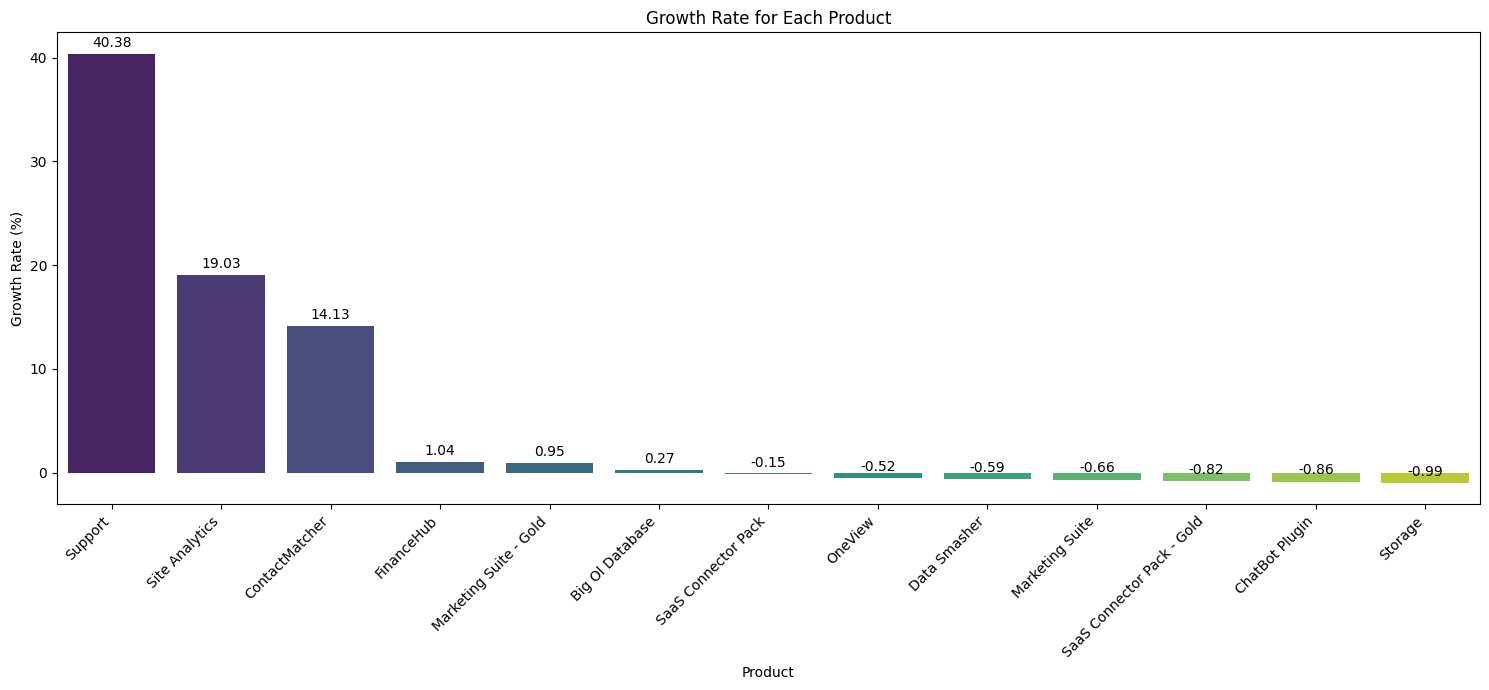

In [67]:
# Drop rows with NaN growth rates
product_growth.dropna(subset=['Growth Rate (%)'], inplace=True)

# Plotting
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=product_growth, x=product_growth.index, y=product_growth['Growth Rate (%)'], palette='viridis')
plt.xlabel('Product')
plt.ylabel('Growth Rate (%)')
plt.title('Growth Rate for Each Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

**Insight**
<br>

- Highest growth rate of product is **Support** with **40.38%**
- Lowest growth rate of product is **Storage** with **-0.99%**
- The Top 3 of product Growth were in the Top 5 of Customer Most Prefered Product **Support, Site Analytics, Contact Matcher**.

## **3. Discount for Product Sales**
<br>
Since we had Sales, Profit, and Discount column, let's take a look further into it. 

### **a. Correlation Between Sales, Profit, and Discount**

In [68]:
# See Correlation between Sales, Profit, and Discount
corr_sales = df[['Sales', 'Profit', 'Discount']].corr()
corr_sales

,Sales,Profit,Discount
Sales,1.000000,0.479064,-0.028190
Profit,0.479064,1.000000,-0.219487
Discount,-0.028190,-0.219487,1.000000


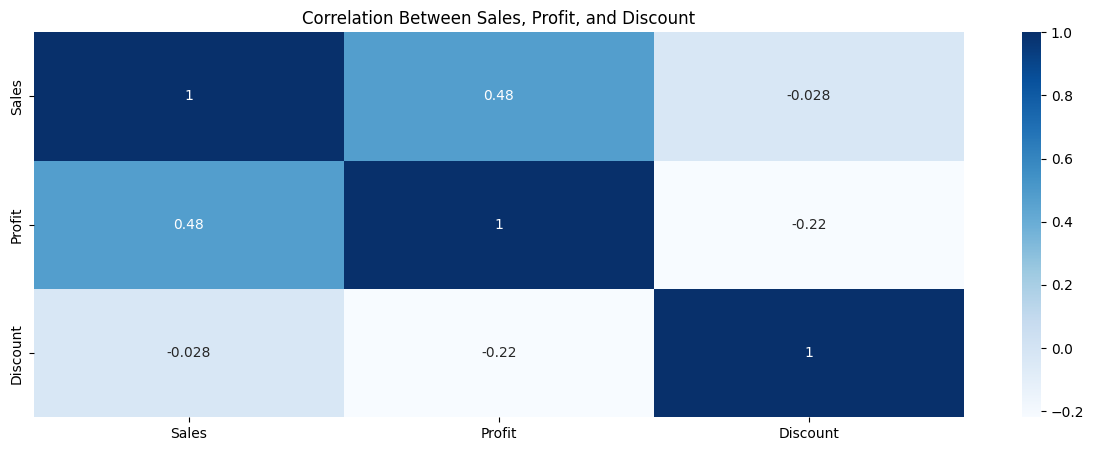

In [69]:
plt.figure(figsize=(15,5))
sns.heatmap(data=corr_sales, annot=True, cmap='Blues')
plt.title('Correlation Between Sales, Profit, and Discount');

**Insight**
<br>

We can see that:
- Sales and Profit had a Moderate Positive Correlation 
- Sales anf Discount had a Very Weak Negative Correlation
- Profit and Discount had a Weak Negative Correlation

Since Profit and Discount had a Weak Negative Correlation, let's look into it further by try to calculate Profit by Discount Level.
If we try to display it in scatterplot, we can noticed it right away profit by discount level. Let's try to display it with scatter plot.

### **b. Profit by Discount Level**

In this section, we're going to look at the profit gain after discount were given to sales product. In order to use the most suitable aggregate function, we need to test the normality distribution of profit (because profit is going to be given an aggregate function).  

We're going to use **Shapiro Wilk Normality Test**. The test consider as the **STRONGEST TEST** to assess normal distribution. Therefore, we need to import library **scipy.stats** to use shapiro test function.

In [70]:
# Import Library
import scipy.stats as stats

# Perform Shapiro-Wilk normality test
stat, pvalue = stats.shapiro(df['Profit'])
print(f"Shapiro-Wilk Test:\nStatistic = {stat}, p-value = {pvalue}")

# Interpret the test result
alpha = 0.05

if pvalue > alpha:
    print("The data follows a NORMAL distribution (fail to reject H0)")
else:
    print("The data does NOT follow a NORMAL distribution (reject H0)")


Shapiro-Wilk Test:
Statistic = 0.25709789991378784, p-value = 0.0
The data does NOT follow a NORMAL distribution (reject H0)


**Insight**
<br><br>
Statistic result reveal **Statistic = 0.25709789991378784**, means that the data are **NOT NORMALLY DISTRIBUTED**. Therefore we need to use **MEDIAN** as the aggregate function for profit gain after discount.

In [71]:
# Calculate profit for each discount level
profit_by_discount = df.groupby('Discount')['Profit'].median().round(2).reset_index()
profit_by_discount = profit_by_discount.rename(columns={'Discount': 'Discount Level', 'Profit': 'Profit Gain Discount'})
profit_by_discount

,Discount Level,Profit Gain Discount
0,0.00,16.00
1,0.10,54.32
2,0.15,14.10
3,0.20,6.49
4,0.30,-25.38
5,0.32,-46.98
6,0.40,-57.62
7,0.45,-167.32
8,0.50,-185.28
9,0.60,-12.06


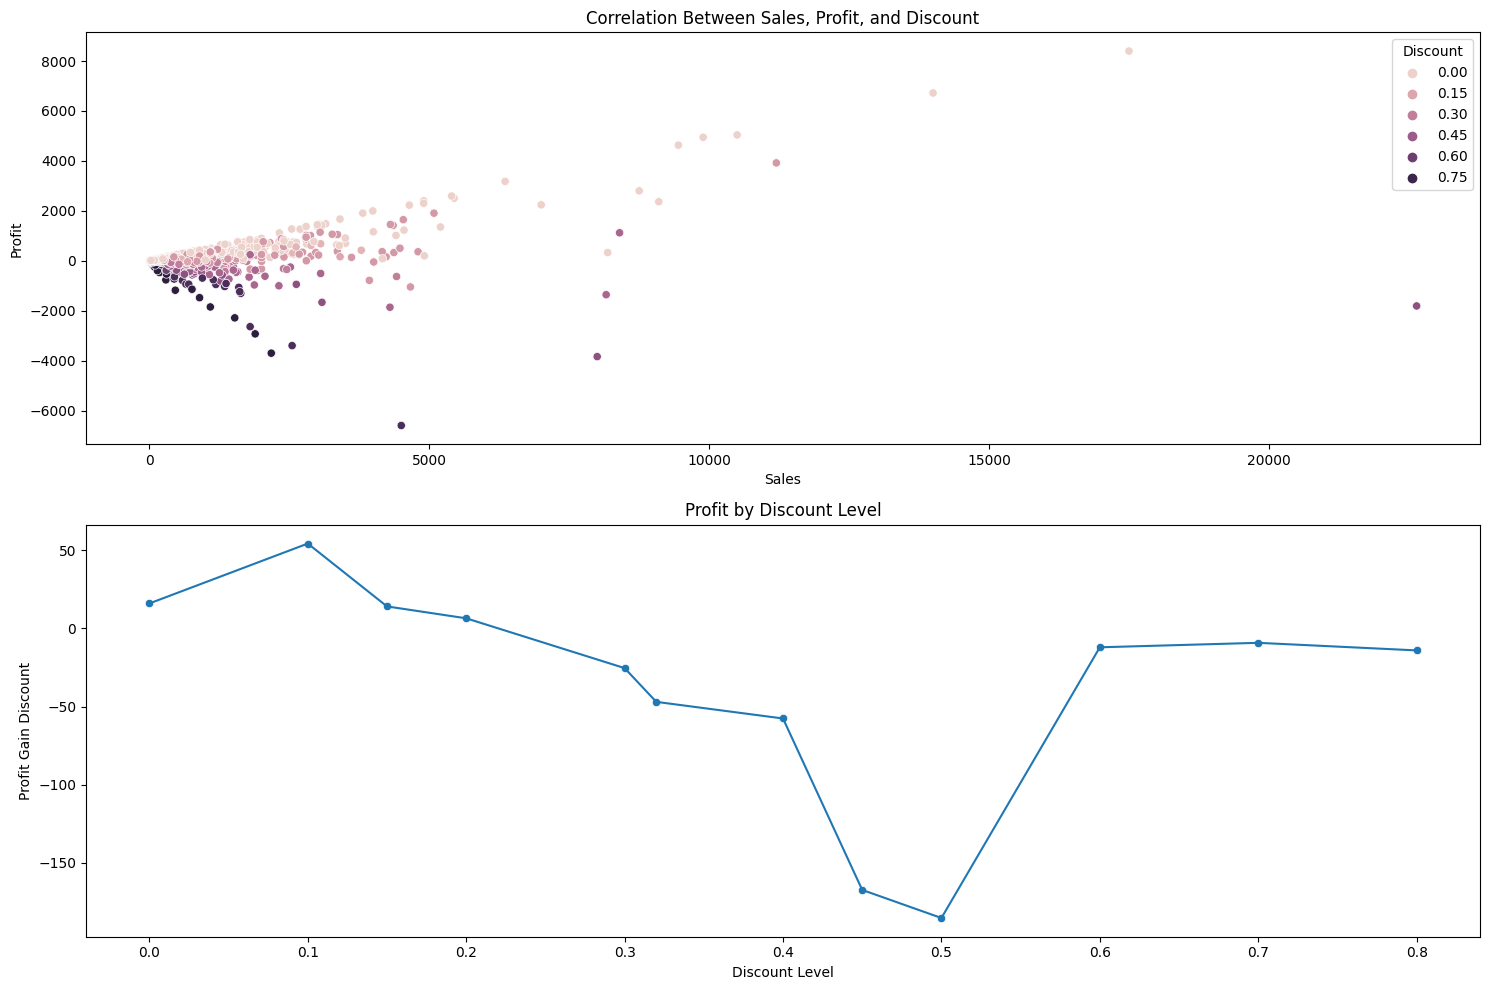

In [72]:
# Create a 2x1 subplot grid
plt.figure(figsize=(15, 10))

# First subplot for Correlation Between Sales, Profit, and Discount
plt.subplot(2, 1, 1)
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Discount')
plt.title('Correlation Between Sales, Profit, and Discount')

# Second subplot for Profit by Discount Level
plt.subplot(2, 1, 2)
sns.lineplot(data=profit_by_discount, x='Discount Level', y='Profit Gain Discount')
sns.scatterplot(data=profit_by_discount, x='Discount Level', y='Profit Gain Discount')
plt.title('Profit by Discount Level')

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

**Insight**
<br>

- If we take a look at scatterplot, we can noticed it right away profit by discount level. The Greater The Discount, The Greater The Loss of Profit we get.
- From the line plot, we can notice that discount at 0.15 to 0.5 is gradually dropping. Which means there's a profit loss caused by discount given to the product. 
- We've found out that Discount Level at 0.10 (10%), we still can get a Profit by discount up to **54.32 dollar**. Which means The Highest Profit Gain Discount from all Discount Level.
- Suggestion; If we're going to gave a discount for the prodoct (either for event, promotion, gift card, voucher, etc), it will be better if we gave it at 10%, because we can still get the profit from the product.

## **Conclusion**
<br>

1. **Financial Summary**

- a. The proportion we get from Financial Summary are:
    - Total Revenue with <t> **50%** at **$ 2.297.200.86**
    - Total Profit with <t> **6.2%** at **$ 286.397.02**
    - Total Income with <t> **43.8%** at **$ 2.010.803.84**
    - Profit Margin with <t> **12.47%**
<br><br>

- b. In General, each product has a noticable positive profit with **Greatest Profitability** product is **SaaS Connector Pack - Gold** (**42.27%**) and **Lowest         Profitability** by Product is **Marketing Suite with** (**-3.02%**)

- c. Sales Trend
    - For sales through out the year, in **2021** sales had **Drop** to **470532.5090** compared to 2020 sales accumulation at 484247.4981. Since then Sales has gradualy increacing, significantly in **2023** with total sales **733947.0232**. 
    - We can conclude there's a pattern in yearly sales where 2 of months at the end of year had a **Significant Increase**, especially in **November 2023** where it's **The Peak of Sales** from all of the monthly sales throughout the year.


2. **Product**
- Best Selling Product is the product where it's love by the customer (based on customer most prefered product through count of repurchases). **ContactMatcher, FinanceHub, Site Analytics** Top 5 Best Seller Products and Top 5 Customer Most Prefered Product
- We have a space for improvement of sales based on customer prefered product that not included in top 5 of sales. For example **SaaS Connector Pack** that placed **4th** in the most prefered product while in the sales rank was placed at **10th**
- From insight above we can conclude that there's an aspect/factor we can anylize further for **customers habit or behaviour** that can determine kind of products they choose to suit the **business enviornment** they encounter or even **demographics** of the place itself-such as Region, Sub-Region, Country, or even City.
- The Top 3 of product Growth were in the Top 5 of Customer Most Prefered Product **Support, Site Analytics, Contact Matcher**.

3. **Discount**
- We can conclude that The Greater The Discount, The Greater The Loss of Profit we get.
- Discount Level at 0.10 (10%), we still can get a Profit by discount up to **54.32 dollar**. Which means The Highest Profit Gain Discount from all Discount Level.


## **Advice**

Based on all of **Insight**, there are a few point can be made to improve next product sales in the future:
- Based on **Sales Trend (Yearly and Monthly Sales)**, 
    - In the future, when we're about to held event, promotion, or etc., we can put the agenda to be execute/schedule/held at **The Last Two Month of The Year**. Or maybe held an event in the begging of the year to prevent sales drop at the early year. For example, held a **Year End Sale** in either **November or December**. Or held an event in the January for a **New Year Sale**.
<br><br>

- Based on **Customer Prefered Product**, 
    - By anylizing the needs and **customers habit or behaviour** it can determine kind of products they choose to suit the **business enviornment** they encounter or even **demographics** of the place itself-such as Region, Sub-Region, Country, or even City, to improve/increase product sales based on customer prefered product. 
        - For example **SaaS Connector Pack** that placed **4th** in the most prefered product while in the sales rank was placed at **10th**
<br><br>

- Based on **Product Growth**, 
    - We can maximize sales of produts where they had pretty significant growth rate and prefered by customer. For example, product **Support** was placed **8th** in "Product by Revenue", but in "Most Prefered Product by Customers" **Support** placed **2nd**. Where **Support** it self has **The Highest Rate of Product Growth** among all of them all. Product **Support** has a great possibility to climb up the product sales into the top 5 if we can increase the sales of it.
<br><br>
      
- Based on **Profit by Discount Level**, 
    - For the discount given to the product (either for event, promotion, gift card, voucher, etc) **10%** would the **Best Choice**, hence we can still get the profit from the product.